# PUBG Finish Placement Prediction
**Froma Kaggle:[The dataset: PUBG Finish Placement Prediction](https://www.kaggle.com/c/pubg-finish-placement-prediction/data)**

### Step 1: Overview of the dataset
### Step 2: Data Cleaning
### Step 3: Exploratory Data Analysis
### Step 4: Feature Engineering & Outlier Detection
### Step 5: Prepare Dataset for Model
### Step 6: Raddom Forest Modeling

In [ ]:
#load the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#package for machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from fastai.imports import *

import warnings
warnings.filterwarnings('ignore')

#!!!Please change the path to you computer path to load the dataset!!!
PATH='/Users/bravery_simon/Downloads/'

#Load the dataset
train_df = pd.read_csv(f'{PATH}train_V2.csv')
test_df = pd.read_csv(f'{PATH}test_V2.csv')

# 1. Overview of the dataset

In [2]:
train_df.info()
print('-'*40)
print('Shape of training dataset: ', train_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB
----------------------------------------
Shape of training dataset:  (4446966, 29

####  There are about 4 million data entries with 29 variables, including the target variable: winPlacePerc.

In [3]:
print("First 5 rows: ")
train_df.head()

First 5 rows: 


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
train_df.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


# 2. Data Cleaning

In [5]:
#data cleaning -- missing values
train_df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
train_df.dropna(inplace=True)
train_df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# 3. Exploratory Data Analysis
* Correlation matrix
* walkingDistance
* kills
* damageDealt
* heals and boosts
* matchType

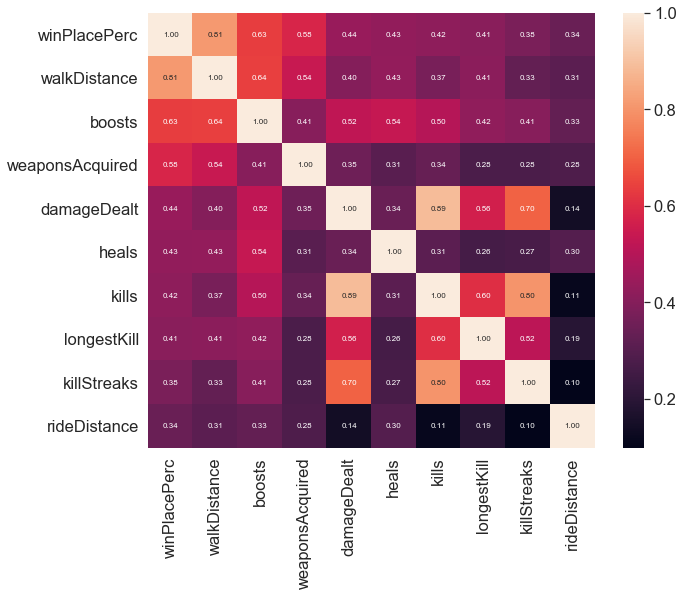

In [7]:
# Exploratory data analysis
#correlation matrix
k =10
corrmat=train_df.corr()
cols = corrmat.nlargest(k,'winPlacePerc').index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.5)
f,ax = plt.subplots(figsize=(10,8))
p = sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',annot_kws={'size':8},yticklabels=cols.values, xticklabels=\
                cols.values)
plt.show()

Players' average walking distance is 1154.22m, 99% players walked 4396.0m or less,the longest walking is 25780.0m.


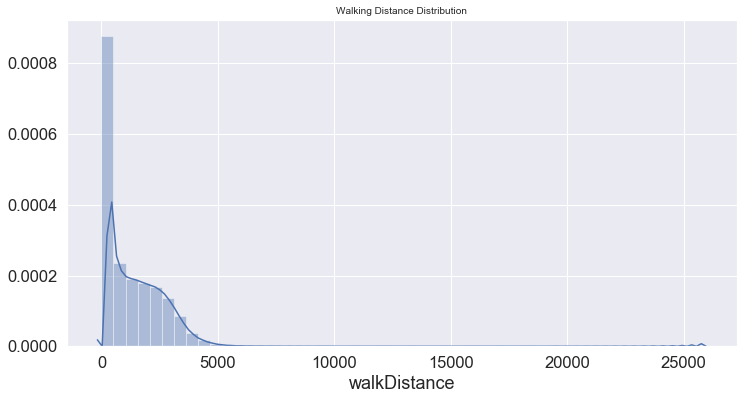

In [8]:
#Walkingdistance
print("Players' average walking distance is {:.2f}m, 99% players walked {}m or less,the longest walking is {}m."\
.format(train_df['walkDistance'].mean(),train_df['walkDistance'].quantile(0.99),train_df['walkDistance'].max()))

data = train_df.copy()
plt.figure(figsize=(12,6))
sns.distplot(data['walkDistance'])
plt.title("Walking Distance Distribution",fontsize=10)
plt.show()

Every player kills 0.92 players, 99% of players have 7.0 kills or less, the most kills in is 72.


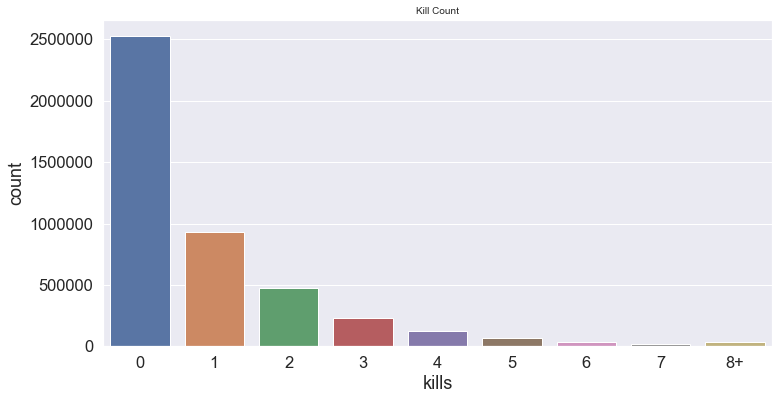

In [9]:
#kills
print("Every player kills {:.2f} players, 99% of players have {} kills or less, the most kills in is {}.".format\
           (train_df['kills'].mean(),train_df['kills'].quantile(0.99),train_df['kills'].max()))

data = train_df.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)]='8+'
plt.figure(figsize=(12,6))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=10)
plt.show()

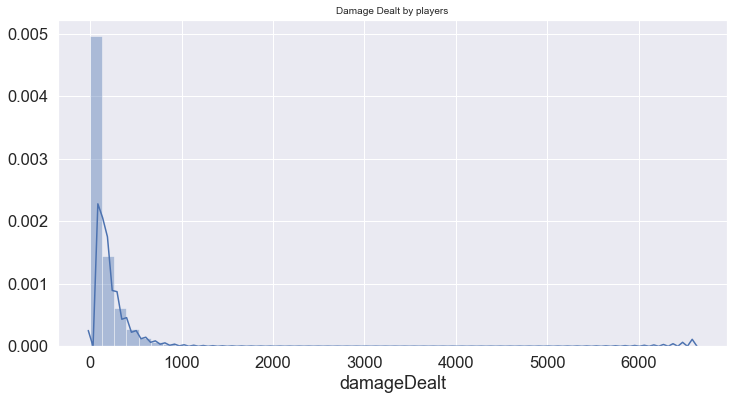

In [10]:
#damageDealt
data =  train_df.copy()
plt.figure(figsize=(12,6))
sns.distplot(data['damageDealt'])
plt.title('Damage Dealt by players',fontsize=10)
plt.show()

The average person uses 1.3701475050961722 heal items, 99% of people use 12.0 or less, the highest used 80.
The average person uses 1.1069079698176172 boost items, 99% of people use 7.0 or less,the highest used 33.


No handles with labels found to put in legend.


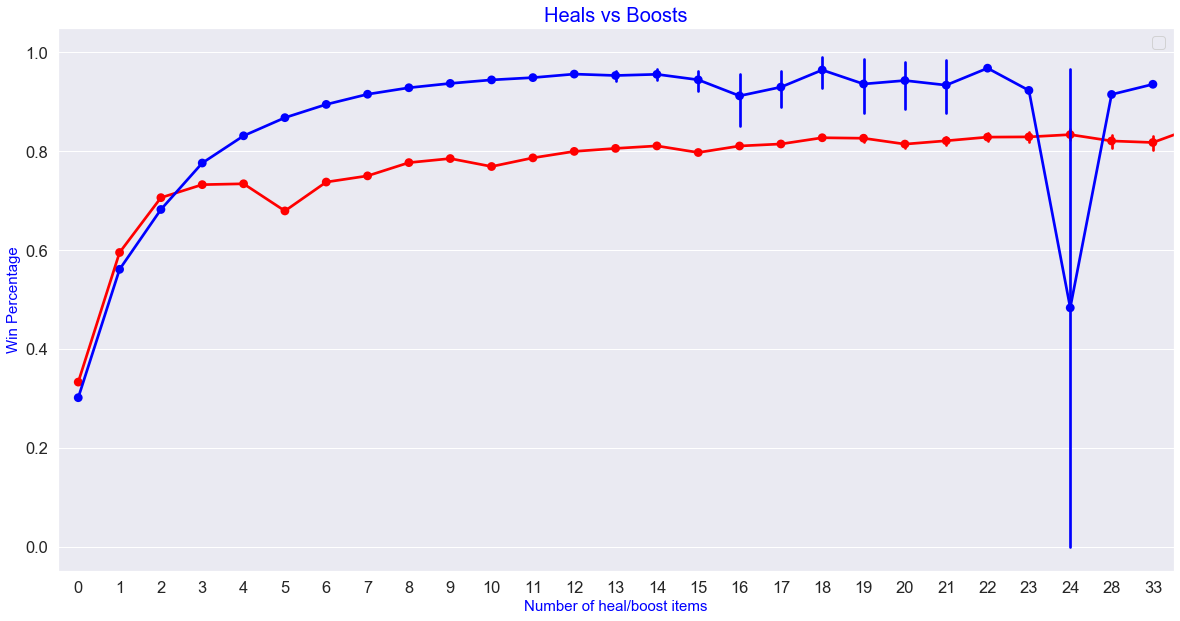

In [11]:
#heals and boosts
print("The average person uses {} heal items, 99% of people use {} or less, the highest used {}.".format\
(train_df['heals'].mean(), train_df['heals'].quantile(0.99), train_df['heals'].max()))
print("The average person uses {} boost items, 99% of people use {} or less,the highest used {}.".format\
(train_df['boosts'].mean(), train_df['boosts'].quantile(0.99), train_df['boosts'].max()))

f,ax = plt.subplots(figsize=(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=train_df,color='red',alpha=0.8,label='heals')
sns.pointplot(x='boosts',y='winPlacePerc',data=train_df,color='blue',alpha=0.8,label='boosts')
plt.legend()
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.show()

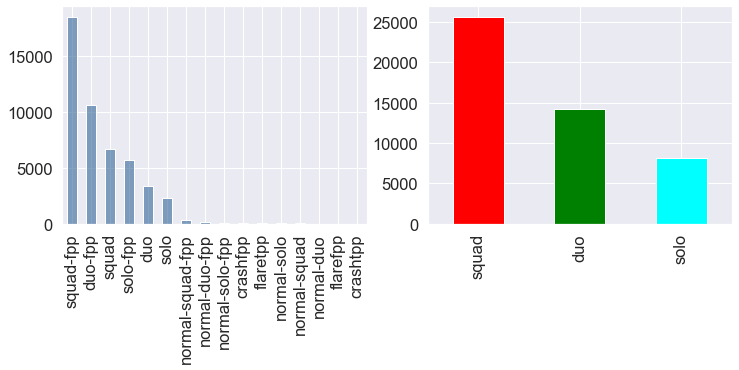

In [12]:
#matchType
fig,ax=plt.subplots(1,2,figsize=(12,4))

train_df.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0],color=(0.2, 0.4, 0.6, 0.6))

mapping=lambda x: "solo" if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'

train_df['matchType']=train_df['matchType'].apply(mapping)
train_df.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1],color=['red','green','cyan'])

# 4. Feature Engineering & Outlier Detecion
* Normalization
* Created new features
* Remove the outliers

Text(0.5, 1.0, 'Players_Per_Match')

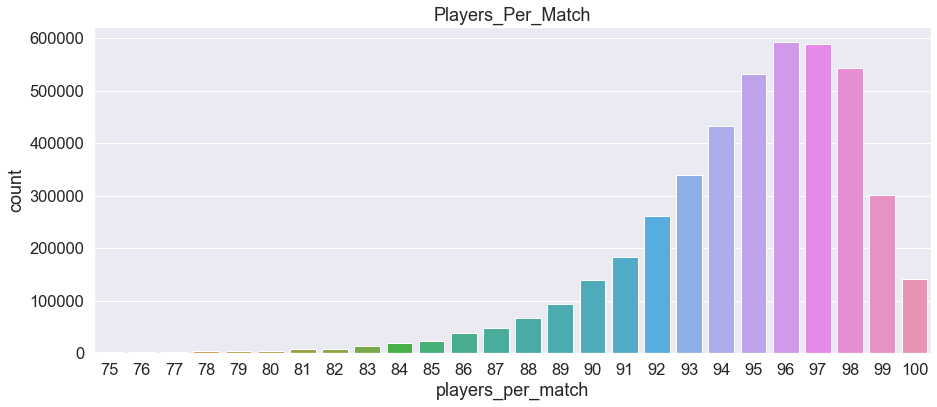

In [13]:
#Feature Engineering
train_df['players_per_match']=train_df.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,6))
sns.countplot(train_df[train_df['players_per_match']>=75]['players_per_match'])
plt.title('Players_Per_Match')

In [14]:
#create normalized features
train_df['killsNorm'] = train_df['kills']*((100-train_df['players_per_match'])/100+1)
train_df['damageDealtNorm'] = train_df['damageDealt']*((100-train_df['players_per_match'])/100 + 1)
train_df['maxPlaceNorm']=train_df['maxPlace']*((100-train_df['players_per_match'])/100 + 1)
train_df['matchDurationNorm'] = train_df['matchDuration']*((100-train_df['players_per_match'])/100 + 1)

In [15]:
#new feature healandboost
train_df['healsandboosts'] = train_df['heals'] + train_df['boosts']
# new feature totalDistance
train_df['totalDistance'] = train_df['rideDistance'] + train_df['walkDistance'] + train_df['swimDistance']
#new feature headshot_rate
# Create headshot_rate feature
train_df['headshot_rate'] = train_df['headshotKills'] / train_df['kills']
train_df['headshot_rate'] = train_df['headshot_rate'].fillna(0)

In [16]:
#outlier detection
train_df['killsWithoutMoving']=((train_df['kills']>0)&(train_df['totalDistance']==0))
display(train_df[train_df['killsWithoutMoving']==True].shape)
train_df[train_df['killsWithoutMoving'] == True].head(5)

(1535, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,players_per_match,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,headshot_rate,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.8571,58,8.52,842.060,21.30,842.06,3,0.0,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.6000,42,4.74,547.628,17.38,2834.52,6,0.0,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.8947,21,35.80,3132.500,35.80,1607.42,5,0.0,0.2,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0000,73,1.27,200.406,24.13,1014.73,0,0.0,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.3000,42,1.58,158.000,17.38,2834.52,0,0.0,1.0,True


In [17]:
display(train_df[train_df['kills']>45].shape)
train_df[train_df['kills']>45].head(5)

(19, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,players_per_match,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,headshot_rate,killsWithoutMoving
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0.7,11,90.72,10355.31,20.79,3398.22,7,23.71,0.250000,False
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,1.0,11,122.85,12504.24,20.79,3398.22,5,1036.00,0.200000,False
672993,da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,...,1.0,28,98.04,9963.96,25.80,3092.56,2,24.27,0.087719,False
770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,...,1.0,19,99.55,10058.17,34.39,3254.38,4,85.55,0.127273,False
797111,7f3edd982813e6,10a20932a5cf8f,cfa2775c9ef944,6,0,5406.0,0,16,14,1,...,1.0,41,89.04,8595.54,58.83,2857.23,14,287.50,0.285714,False


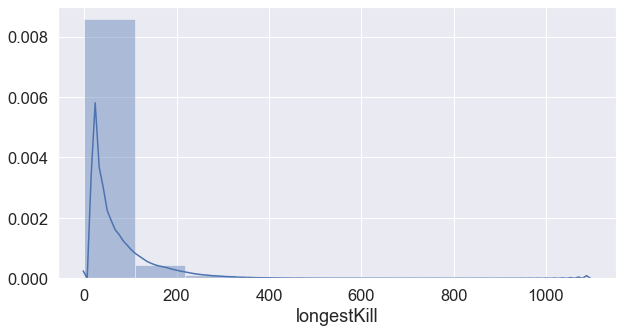

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(train_df['longestKill'], bins=10)
plt.show()

In [19]:
display(train_df[train_df['longestKill'] >= 1000].shape)
train_df[train_df['longestKill'] >= 1000].head(5)

(23, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,players_per_match,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,headshot_rate,killsWithoutMoving
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.9231,88,4.48,877.968,30.24,2087.68,4,3775.20,0.250000,False
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.5385,29,18.81,2195.640,23.94,2236.68,7,48.87,0.454545,False
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,1.0000,51,14.90,1531.720,19.37,1040.02,0,2981.00,0.000000,False
523088,1ff9763ca30279,7fb3a83ebb050d,838cb9a3c94598,0,0,151.2,0,0,0,45,...,0.7143,60,1.40,211.680,11.20,1673.00,0,0.00,0.000000,True
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.6000,41,25.44,2241.900,9.54,1734.69,0,29.21,0.312500,False


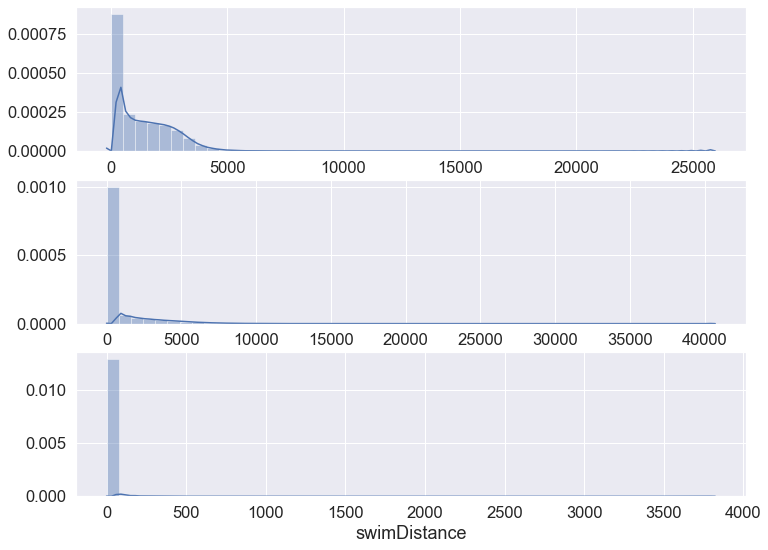

In [20]:
f, axes = plt.subplots(3, 1, figsize=(12,9),sharex=False)
sns.distplot(train_df['walkDistance'],ax=axes[0])
sns.distplot(train_df['rideDistance'],ax=axes[1])
sns.distplot(train_df['swimDistance'],ax=axes[2])   

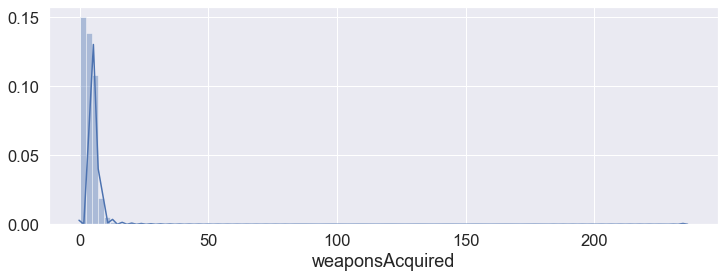

In [21]:
plt.figure(figsize=(12,4))
sns.distplot(train_df['weaponsAcquired'], bins=100)
plt.show()

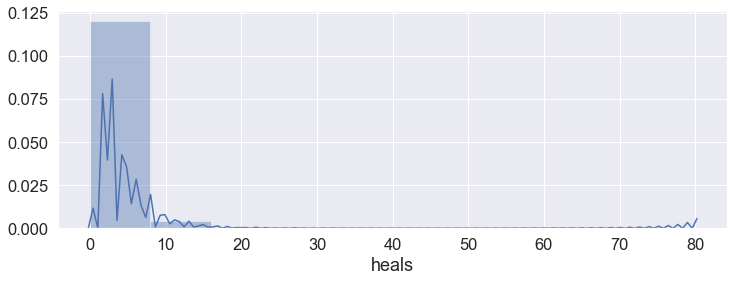

In [22]:
plt.figure(figsize=(12,4))
sns.distplot(train_df['heals'], bins=10)
plt.show()

In [23]:
#drop the outliers
train_df.drop(train_df[train_df['killsWithoutMoving']==True].index,inplace=True)
train_df.drop(train_df[train_df['kills'] > 45].index, inplace=True)
train_df.drop(train_df[train_df['longestKill'] >= 1000].index,inplace=True)
train_df.drop(train_df[train_df['walkDistance'] >= 10000].index,inplace=True)
train_df.drop(train_df[train_df['rideDistance'] >= 20000].index,inplace=True)
train_df.drop(train_df[train_df['swimDistance'] >= 2000].index, inplace=True)
train_df.drop(train_df[train_df['weaponsAcquired'] >= 80].index,inplace=True)
train_df.drop(train_df[train_df['heals'] >= 40].index, inplace=True)

#  5. Prepare dataset for model
* transform/encode categorical variables

In [24]:
#the categorical variables
train_df = pd.get_dummies(train_df,columns=['matchType'])
matchType_encoding=train_df.filter(regex='matchType')
matchType_encoding.head()

,matchType_duo,matchType_solo,matchType_squad
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [25]:
train_df['groupId'] = train_df['groupId'].astype('category')
train_df['matchId'] = train_df['matchId'].astype('category')
train_df['groupId_cat'] = train_df['groupId'].cat.codes
train_df['matchId_cat'] = train_df['matchId'].cat.codes
train_df.drop(columns=['groupId', 'matchId'], inplace=True)

In [26]:
train_df.drop(columns = ['Id'], inplace=True)

In [45]:
#to double ensure
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in train_df.columns:
    if train_df[column_name].dtype == object:
        train_df[column_name] = le.fit_transform(train_df[column_name])
    else:
        pass

# 6. Random Forest Modeling
* split the train dataset to train and validation.
* set the model metrics: Mean absolute error.
* Train the model.
* Get the prediction result on test dataset. 

In [28]:
#Raddom Forest Modeling
#splitting training and validation data
df=train_df.drop(columns=['winPlacePerc'])
y=train_df['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(df, y,test_size=0.20)
print("train shape: ", X_train.shape,"target shape: ",y_train.shape,'validation shape: ',X_test.shape)

train shape:  (3555884, 38) target shape:  (3555884,) validation shape:  (888971, 38)


In [30]:
#Set metrics: mean absolute error
from sklearn.metrics import mean_absolute_error
def print_score(model:RandomForestRegressor):
    res = ['mae train:', mean_absolute_error(model.predict(X_train),y_train),
          'mae val',mean_absolute_error(model.predict(X_test),y_test)]
    print(res)

In [31]:
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',n_jobs=-1)
model.fit(X_train, y_train)
print_score(model)

['mae train:', 0.03557628868706454, 'mae val', 0.05824899436091982]


In [33]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
fi = rf_feat_importance(model, df); fi[:10]

,cols,imp
21,walkDistance,0.222678
6,killPlace,0.204650
30,totalDistance,0.204023
1,boosts,0.084136
22,weaponsAcquired,0.053804
29,healsandboosts,0.038163
16,rideDistance,0.025870
10,longestKill,0.017099
26,damageDealtNorm,0.017002
2,damageDealt,0.015346


In [35]:
keep_variables = fi[fi.imp>0.005].cols
print('Significant features: ', len(keep_variables))
to_keep

Significant features:  19


21         walkDistance
6             killPlace
30        totalDistance
1                boosts
22      weaponsAcquired
29       healsandboosts
16         rideDistance
10          longestKill
26      damageDealtNorm
2           damageDealt
25            killsNorm
28    matchDurationNorm
11        matchDuration
5                 heals
8                 kills
13            numGroups
24    players_per_match
27         maxPlaceNorm
12             maxPlace
Name: cols, dtype: object

In [40]:
df = train_df[keep_variables]
y=train_df['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(df, y,test_size=0.20)
print("train shape: ", X_train.shape,"target shape: ",y_train.shape,'validation shape: ',X_test.shape)

train shape:  (3555884, 19) target shape:  (3555884,) validation shape:  (888971, 19)


In [41]:
model_2 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',n_jobs=-1)
model_2.fit(X_train, y_train)
print_score(model_2)

['mae train:', 0.035712697106582675, 'mae val', 0.05760399102013899]


In [43]:
#prepare the test dataset
test_df['headshot_rate'] = test_df['headshotKills'] / test_df['kills']
test_df['headshot_rate'] = test_df['headshot_rate'].fillna(0)
test_df['totalDistance'] = test_df['rideDistance'] + test_df['walkDistance'] + test_df['swimDistance']
test_df['players_per_match'] = test_df.groupby('matchId')['matchId'].transform('count')
test_df['killsNorm'] = test_df['kills']*((100-test_df['players_per_match'])/100 + 1)
test_df['damageDealtNorm'] = test_df['damageDealt']*((100-test_df['players_per_match'])/100 + 1)
test_df['maxPlaceNorm'] = test_df['maxPlace']*((100-train_df['players_per_match'])/100 + 1)
test_df['matchDurationNorm'] = test_df['matchDuration']*((100-test_df['players_per_match'])/100 + 1)
test_df['healsandboosts'] = test_df['heals'] + test_df['boosts']
test_df['killsWithoutMoving'] = ((test_df['kills'] > 0) & (test_df['totalDistance'] == 0))

# Turn groupId and match Id into categorical types
test_df['groupId'] = test_df['groupId'].astype('category')
test_df['matchId'] = test_df['matchId'].astype('category')

# Get category coding for groupId and matchID
test_df['groupId_cat'] = test_df['groupId'].cat.codes
test_df['matchId_cat'] = test_df['matchId'].cat.codes

# Remove irrelevant features from the test set
test_pred = test_df[keep_variables].copy()

test_pred.fillna(0, inplace=True)

In [44]:
#make prediction
predictions = np.clip(a = model_2.predict(test_pred), a_min = 0.0, a_max = 1.0)
pred_df = pd.DataFrame({'Id' : test_df['Id'], 'winPlacePerc' : predictions})

#Create submission file
#pred_df.to_csv("submission.csv", index=False)